In [24]:
import pandas as pd                 #dataframe
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt     #graficas
import seaborn as sns               #graficas estadisticas

In [2]:
# Se carga el conjunto de datos
datasets = pd.read_excel ('mttoMetalitec.xlsx')
datasets.head()

,Fecha,Presion Aire (PSI),Presion Neumatica (PSI),Corriente (Ampers),Presion Cilindro Longitudinal (PSI),Presion Cilindro Transversal (PSI),Mantenimiento Correctivo
0,2022-10-01,293,302,169,167,311,0
1,2022-09-30,309,313,161,166,304,0
2,2022-09-29,291,302,152,177,308,0
3,2022-09-28,316,294,173,153,290,0
4,2022-09-27,295,291,167,153,296,0


In [3]:
# Creación de los valores X,Y
X = datasets.iloc[:, [1,2,3,4,5]].values
y = datasets.iloc[:, 6].values

In [12]:
# Grid SVC
param_grid = {'kernel': ['poly', 'rbf', 'linear', 'sigmoid'],
              'gamma': ['scale','auto']}

base_clf=SVC()

grid_search=GridSearchCV(base_clf, param_grid, cv=5)
grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'linear', 'sigmoid']})

In [13]:
for rank, params in zip(grid_search.cv_results_['rank_test_score'], grid_search.cv_results_['params']):
  print(rank, params)

4 {'gamma': 'scale', 'kernel': 'poly'}
5 {'gamma': 'scale', 'kernel': 'rbf'}
2 {'gamma': 'scale', 'kernel': 'linear'}
6 {'gamma': 'scale', 'kernel': 'sigmoid'}
1 {'gamma': 'auto', 'kernel': 'poly'}
6 {'gamma': 'auto', 'kernel': 'rbf'}
2 {'gamma': 'auto', 'kernel': 'linear'}
6 {'gamma': 'auto', 'kernel': 'sigmoid'}


In [5]:
# Grid search RFC
param_grid = {'criterion' : ['gini', 'entropy', 'log_loss'],
              'max_features' : ['sqrt','log2']}

base_clf=RandomForestClassifier()

grid_search=GridSearchCV(base_clf, param_grid, cv=5)
grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2']})

In [6]:
for rank, params in zip(grid_search.cv_results_['rank_test_score'], grid_search.cv_results_['params']):
  print(rank, params)

6 {'criterion': 'gini', 'max_features': 'sqrt'}
2 {'criterion': 'gini', 'max_features': 'log2'}
5 {'criterion': 'entropy', 'max_features': 'sqrt'}
1 {'criterion': 'entropy', 'max_features': 'log2'}
3 {'criterion': 'log_loss', 'max_features': 'sqrt'}
3 {'criterion': 'log_loss', 'max_features': 'log2'}


In [8]:
# Grid search LR
param_grid = {'solver' : ['lbfgs', 'liblinear', 'sag'],
              'multi_class': ['auto', 'ovr', 'multinomial']}

base_clf=LogisticRegression()

grid_search=GridSearchCV(base_clf, param_grid, cv=5)
grid_search.fit(X,y)

C:\Users\Kar-Los\Anaconda3\envs\UPMH\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kar-Los\Anaconda3\envs\UPMH\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'solver': ['lbfgs', 'liblinear', 'sag']})

In [9]:
for rank, params in zip(grid_search.cv_results_['rank_test_score'], grid_search.cv_results_['params']):
  print(rank, params)

1 {'multi_class': 'auto', 'solver': 'lbfgs'}
4 {'multi_class': 'auto', 'solver': 'liblinear'}
6 {'multi_class': 'auto', 'solver': 'sag'}
1 {'multi_class': 'ovr', 'solver': 'lbfgs'}
4 {'multi_class': 'ovr', 'solver': 'liblinear'}
6 {'multi_class': 'ovr', 'solver': 'sag'}
1 {'multi_class': 'multinomial', 'solver': 'lbfgs'}
9 {'multi_class': 'multinomial', 'solver': 'liblinear'}
6 {'multi_class': 'multinomial', 'solver': 'sag'}


In [14]:
# Seleccionar el algoritmo para clasificar

classifier=SVC(gamma= 'auto', kernel= 'poly')
#classifier=RandomForestClassifier(criterion= 'entropy', max_features= 'log2', n_estimators=100)
#classifier=LogisticRegression(multi_class= 'multinomial', solver= 'lbfgs')

In [15]:
# Se normalizan los datos
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import numpy as np

# Se deben realizar repeticiones del algoritmo para observar la variabilidad del
# algoritmo con los datos
from sklearn.model_selection import train_test_split
N_REPETITIONS=50

# lista para guardar el accuracy
acc=[]

for i in range(N_REPETITIONS):
  # Seleccion del conjunto de datos estratificada
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

  # Se normalizan los datos
  min_max_scaler = preprocessing.MinMaxScaler()
  X_train = min_max_scaler.fit_transform(X_train)
  X_test = min_max_scaler.transform(X_test)

  # Se entrena el clasificador
  classifier.fit(X_train, y_train)

  # Se evalua el modelo
  y_pred=classifier.predict(X_test)

  # Se encuentra la precision (accuracy)
  acc.append(accuracy_score(y_test, y_pred))

print(np.mean(np.array(acc)),'+/-',np.std(np.array(acc)))

0.9690489913544669 +/- 0.006617206701325487


In [16]:
from sklearn.model_selection import cross_val_score
# Se crea el clasificador


# Se normalizan los datos
min_max_scaler = preprocessing.MinMaxScaler()
X_new = min_max_scaler.fit_transform(X)


In [18]:
clf = SVC(gamma= 'auto', kernel= 'poly')
#clf=RandomForestClassifier(criterion= 'entropy', max_features= 'log2', n_estimators=100)
#clf=LogisticRegression(multi_class= 'multinomial', solver= 'lbfgs')

# Se evalua con validación cruzada
scores = cross_val_score(clf, X_new, y, cv=10)
# Se reporta media +/- desviacion estandar
print(np.mean(np.array(scores)),'+/-', np.std(np.array(scores)))

0.9705966380971365 +/- 0.00982363828811486


<AxesSubplot: >

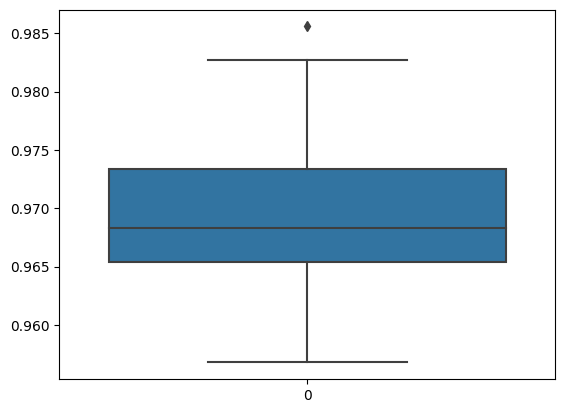

In [32]:
# Realizar diagrama de caja seleccion estratificada
sns.boxplot(data = acc)

<AxesSubplot: >

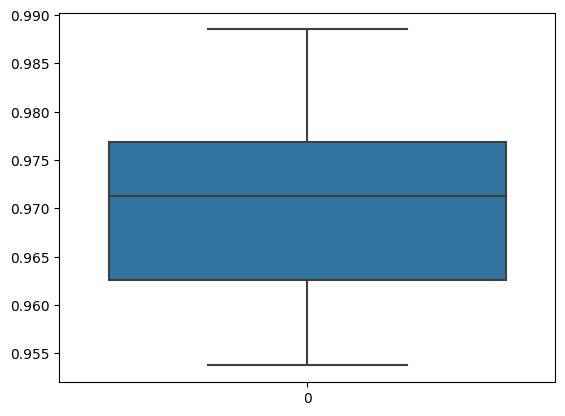

In [30]:
# Seleccion por CV
sns.boxplot(data = scores)